# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Henrique Fazzio Badin</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)


---

# Seção: Fundamentos


---

**Questão 1**: (2.5 pts) Matrizes e SVD



(a) (0.5 pts) Vamos criar uma matriz $A_{100 \times 4}$ de zeros:

In [2]:
# Criando uma matriz de zeros de tamanho 100x4.
A = np.zeros((100, 4))
A.shape

(100, 4)

In [3]:
# As primeiras 5 linhas da matriz A.
A[:5, :]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Agora preencha a matriz A com as seguintes especificações:

- A coluna $1$ tem uma lista de inteiros de $1$ a $100$. Pode usar `list` e `range` padrão do Python, ou pode usar `np.arange` ou `np.linspace` (que provavelmente é o jeito mais fácil).
- A coluna $2$ tem apenas o valor $1$ em todas as posições
- A coluna $3$ tem os inteiros de $101$ a $200$, assim como foi feito para a coluna $1$
- A coluna $4$ tem números aleatórios com distribuição gaussiana padrão (ou seja, média zero e desvio padrão $1$). Use a função `np.random.normal`.

Nota: lembre-se que em Matemática os índices começam em $1$, mas em Python (e em C, C++, JavaScript, Java, Rust, Go, etc.) os índices começam em zero, ok? Portanto $A_{5,3}$ em Matemática é `A[4,2]` em Python.


---

**Resposta**

In [4]:
coluna1 = np.linspace(1, 100, 100)
coluna2 = np.linspace(1, 1, 100)
coluna3 = np.linspace(101, 200, 100)
coluna4 = np.random.normal(0, 1, 100)

# Atribuindo as colunas a matriz A.
A[:, 0] = coluna1
A[:, 1] = coluna2
A[:, 2] = coluna3
A[:, 3] = coluna4

A[:5, :]

array([[  1.        ,   1.        , 101.        ,   0.49671415],
       [  2.        ,   1.        , 102.        ,  -0.1382643 ],
       [  3.        ,   1.        , 103.        ,   0.64768854],
       [  4.        ,   1.        , 104.        ,   1.52302986],
       [  5.        ,   1.        , 105.        ,  -0.23415337]])

---

A célula abaixo calcula a decomposição em valores singulares (SVD - *Singular Value Decomposition*) de $A$:

In [5]:
U, s, Vt = np.linalg.svd(A)

In [6]:
U.shape, s.shape, Vt.shape

((100, 100), (4,), (4, 4))

Responda as perguntas a seguir:

(b) (0.5 pts) Mostre que $U$ e $V$ são ortonormais, ou unitárias. Dica: em Python, o operador `@` multiplica matrizes. Dica: para escrever uma matriz usando poucos dígitos decimais, use o método `.round()` de matrizes - por exemplo, para escrever $M$ com dois dígitos, use `M.round(2)`.

In [7]:
I = (U @ U.T).round(2)
print(np.allclose(np.eye(100), I))
I2 = (Vt.T @ Vt).round(2)
print(np.allclose(np.eye(4), I2))

True
True



---

**Resposta**

Uma matriz ortogonal tem colunas e linhas ortonormais, satisfazendo 𝐴t𝐴 = 𝐴𝐴t = I onde I é a identidade.
Assim como podemos observar nos prints acima, as matrizes $U$ e $V$ são ortonormais, pois a multiplicação de $U$ por sua transposta e de $V$ por sua transposta resultam na matriz identidade.

---

(c) (0.5 pts) O array `s` contém apenas uma lista de números ao invés de ser uma matriz $100 \times 4$. Construa uma matriz $S$ que siga o padrão da SVD, ou seja, $1$ bloco diagonal com os valores de `s`, e um bloco de zeros. Dica: use as funções `np.diag`, `np.zeros` e `np.vstack`


---

**Resposta**

In [8]:
# S = np.zeros((100, 4))
# S[0, 0] = s[0]
# S[1, 1] = s[1]
# S[2, 2] = s[2]
# S[3, 3] = s[3]
# S

S = np.vstack([np.diag(s), np.zeros((96, 4))])
print(S.shape)
S

(100, 4)


array([[1.62954450e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.77160811e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.02714908e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.65374191e-15],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

---

(d) (0.5 pts) Em `s` temos que o menor elemento é efetivamente zero, veja:

In [9]:
s.round(2)

array([1629.54,  177.16,    9.03,    0.  ])

*Baseado na construção de $A$*, explique porque o menor elemento de `s` é zero.


---

**Resposta**

As colunas de A não são Linearmente independentes. Na verdade, col1 + 100*col2 - col3 + 0 * col4 = 0. Portanto, tem uma solução linear não trivial das colunas de A que dão uma coluna nula. Quando isso acontece, a matriz A é singular e o menor valor singular é zero.

---

(e) (0.5 pts) Efetue o produto $\boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^{T}$ e verifique que bate com $A$, a menos de precisão numérica. Dica: use a função `np.allclose` para verificar que dois arrays tem valores muito próximos.


---

**Resposta**

In [10]:
Av = U @ S @ Vt
np.allclose(A, Av)

True

---

**Questão 2** (2.0 pts) O algoritmo de minimização por descida do gradiente funciona da seguinte forma:

- Comece por um ponto de partida qualquer
- Loop:
    - Atualize a estimativa do minimo, adicionando um pequeno multiplo (taxa de aprendizagem) do negativo do gradiente.
    - Se a atualização foi negligível, pare o loop

Eis uma implementação:

In [11]:
def gradient_descent(f, g, x0, eta=0.01, tol=1e-6, max_iter=1000):
    """Algoritmo de otimização do gradiente descendente.

    Args:
        f (callable): Função objetivo.
        g (callable): Gradiente da função objetivo.
        x0 (np.ndarray): Ponto inicial.
        alpha (float): Taxa de aprendizado.
        tol (float): Tolerância para o critério de parada.
        max_iter (int): Número máximo de iterações.
    
    Returns:
        np.ndarray: Ponto ótimo.
    """
    x = x0
    for i in range(max_iter):
        x_new = x - eta * g(x)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    if i == max_iter - 1:
        print("Aviso: número máximo de iterações atingido!")
    return x_new

Nesta implementação você passa *funções* `f(x)` e `g(x)` que computam o valor da função a ser otimizada, e o seu gradiente. Por exemplo, vamos minimizar a função $f(x) = x^2 -4 x + 1$. Seu gradiente é apenas uma derivada simples, pois essa função tem apenas uma variável, e vale $g(x) = 2 x - 4$.

In [12]:
def f(x):
    return x**2 - 4*x + 1

def g(x):
    return 2*x - 4

In [13]:
x_plot = np.linspace(-3, 7, 100)
f_plot = f(x_plot)
g_plot = g(x_plot)

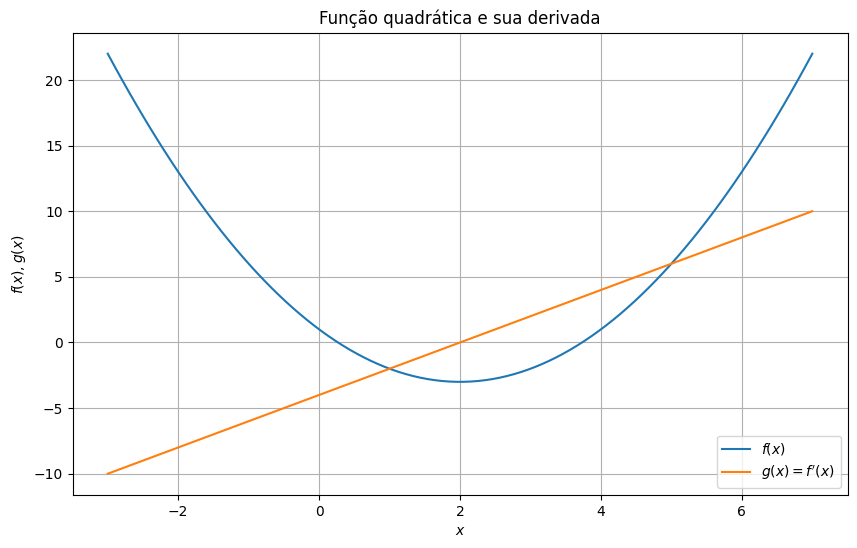

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x_plot, f_plot, label=r'$f(x)$')
plt.plot(x_plot, g_plot, label=r'$g(x) = f^{\prime}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x), g(x)$')
plt.title('Função quadrática e sua derivada')
plt.legend()
plt.grid()
plt.show()

(a) (0.5 pts) Pelo método analítico, qual o ponto de mínimo de $f(x)$?


---

**Resposta**

O Ponto de Mínimo Globa em X seria 2 e em Y seria -3, pois a derivada da função f(x)' = 2x - 4, ou seja, para que f(x)' = 0, 2x = 4. Dessa forma, x só pode ser igual a 2. Para verificarmos que é um ponto de mínimo, podemos calcular a segunda derivada da função f(x)'' = 2, que é positiva, indicando que é um ponto de mínimo.

---

(b) (0.5 pts) Usando a função `gradient_descent` acima podemos achar o mínimo numericamente, veja:

In [15]:
x_min = gradient_descent(f, g, -2, eta=0.1, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

O ponto ótimo é 2.00.


Vamos achar o mínimo numericamente, usando a função `gradient_descent` acima com `eta = 1e-4`, `tol=1e-6` e `max_iter=1000`. O valor correto não será encontrado:

In [16]:
x_min = gradient_descent(f, g, -2, eta=1e-4, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

Aviso: número máximo de iterações atingido!
O ponto ótimo é -1.27.


Explique porque isso aconteceu e como resolver esse problema. Dica: pode modificar a função `gradient_descent` para escrever informações diagnósticas conforme o algoritmo avança.


---

**Resposta**

Isso aconteceu, pois o eta, taxa de aprendizado, é muito baixa, o que faz com que o algoritmo não consiga convergir para o mínimo global com essa quantidade de iterações. Para resolver esse problema utilizando tal eta, podemos aumentar o número máximo de iterações.

---

(c) (0.5 pts) Agora vamos tentar de novo mas com `eta = 1e4`, `tol=1e-6` e `max_iter=1000`. O valor correto não será encontrado:

In [17]:
x_min = gradient_descent(f, g, -2, eta=1e4, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

Aviso: número máximo de iterações atingido!
O ponto ótimo é nan.


Explique porque isso aconteceu e como resolver esse problema. Dica: pode modificar a função `gradient_descent` para escrever informações diagnósticas conforme o algoritmo avança.


---

**Resposta**

Isso aconteceu, pois com o eta muito alto, o algoritmo não consegue convergir para o mínimo global, acaba passando direto pelo objetivo. Para resolver esse problema, podemos diminuir o eta.

---

(d) (0.5 pts) Vamos explorar agora outra função: $f(x) = x^4 - (52 / 3) x^3 + 108 x^2 - 288 x + 290$. A derivada de $f(x)$ é $g(x) = 4 x^3 - 52 x^2 + 216 x - 288$. Veja os gráficos abaixo.

In [18]:
def f(x):
    return x**4 - (52 / 3) * x**3 + 108 * x**2 - 288 * x + 290


def g(x):
    return 4 * x**3 - 52 * x**2 + 216 * x - 288

In [19]:
x_plot = np.linspace(2, 7, 100)
f_plot = f(x_plot)
g_plot = g(x_plot)

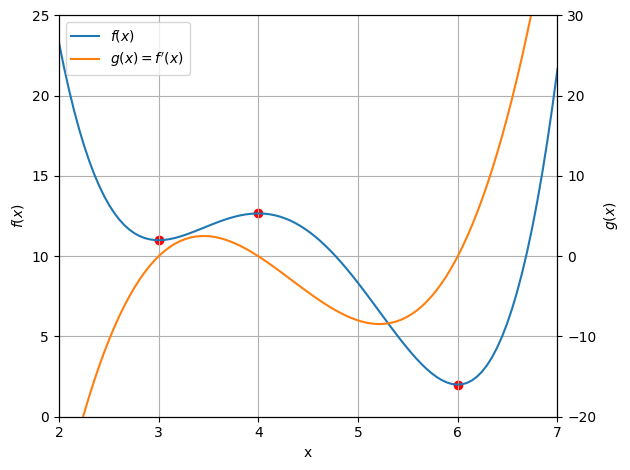

In [20]:
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
lines1 = ax1.plot(
    x_plot,
    f_plot,
    color=color1,
    label=r'$f(x)$',
)
ax1.scatter(
    [3, 4, 6],
    [f(3), f(4), f(6)],
    color='red',
)
ax1.set_xlabel('x')
ax1.set_xlim(2, 7)
ax1.set_ylim(0, 25)
ax1.set_ylabel(r'$f(x)$')

ax2 = ax1.twinx()
color2 = 'tab:orange'
lines2 = ax2.plot(
    x_plot,
    g_plot,
    color=color2,
    label=r'$g(x) = f^{\prime}(x)$',
)
ax2.set_ylim(-20, 30)
ax2.set_ylabel(r'$g(x)$')

lines = lines1 + lines2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
ax1.grid()

fig.tight_layout()
plt.show()

O que aconteceu com o `gradient_descent` se ao buscamos achar o mínimo a partir de $x_{\text{inicial}} = 2$ paramos em $x = 3$ ao invés do ponto ótimo $x = 6$? Explique com suas palavras, e monte um exemplo de código (i.e. chame a função `gradient_descent` com os parâmetros necessários) para demonstrar este fenômeno.


---

**Resposta**

A função apenas encontrará e retornará o minimo local, e não o global.

In [21]:
x_min = gradient_descent(f, g, 2, eta=0.01, tol=1e-6, max_iter=1000)
x_min

2.9999932051022036

---

# Seção: Técnicas

**Questão 3** (2.0 pts) Clustering

(a) (0.5 pts) A função abaixo constroi um dataset simulado com 3 clusters:

In [52]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=300,
    centers=3,
    n_features=2,
    cluster_std=0.5,
    random_state=0,
)

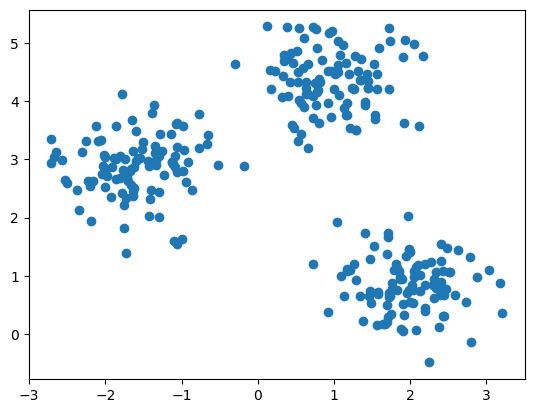

In [53]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Execute uma clusterização `KMeans` e visualize o resultado, explique se o resultado é razoável.


---

**Resposta**

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [56]:
X[:5, :]

array([[ 0.51985897,  4.86229547],
       [ 1.69246883,  0.20598168],
       [ 1.35678894,  4.36462484],
       [-1.5698694 ,  3.01502873],
       [-1.63667453,  2.37586395]])

In [57]:
np.around(kmeans.cluster_centers_, 2)

array([[ 1.48,  2.58],
       [-1.57,  2.91]])

In [58]:
print(X.shape)
print(kmeans.labels_.shape)

(300, 2)
(300,)


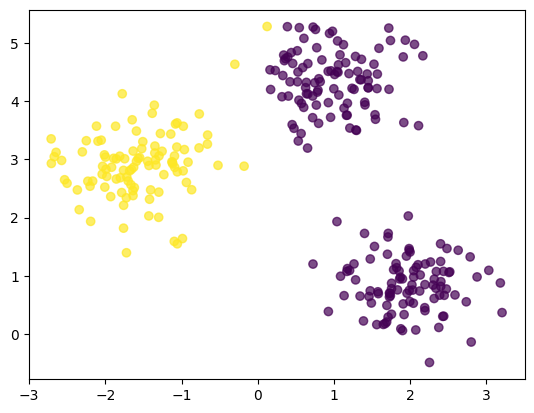

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.7);

O resultado é razoável, pois a clusterização KMeans é um algoritmo de aprendizado não supervisionado que agrupa os dados em k clusters, onde k é o número de clusters definido pelo usuário. O algoritmo funciona iterativamente para atribuir cada ponto de dados a um dos k clusters com base em recursos que são semelhantes entre si.

---

(b) (0.5 pts) Calcule o *silhouette score* do seu clustering (`sklearn.metrics.silhouette_score`)


---

**Resposta**

---

(c) (0.5 pts) Agora vamos multiplicar a primeira coluna de $X$ por $10000$

In [25]:
X_bad = X.copy()
X_bad[:, 0] = X_bad[:, 0] * 10_000

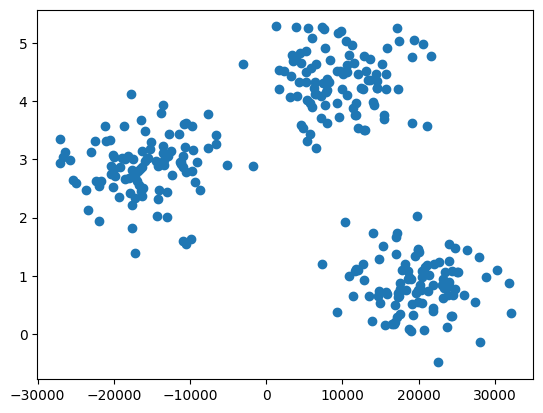

In [26]:
plt.figure()
plt.scatter(X_bad[:, 0], X_bad[:, 1])
plt.show()

Execute uma clusterização `KMeans` neste novo dataset e explique se o resultado é uma clusterização razoável.


---

**Resposta**

---

(d) (0.5 pts) Calcule o *silhouette score* do seu novo clustering e compare com o score do item (b)


---

**Resposta**

---

**Questão 4** (3.5 pts) Regressão

(a) (0.5 pts) Explique porque ao construir a equação normal temos que adicionar uma coluna de $1\text{s}$ na matriz $X$.


---

**Resposta**

---

(b) (3.0 pts) Construa um projeto de regressão sobre os dados do dataset "Liver disorders" do OpenML (https://www.openml.org/search?type=data&status=active&id=8). Para sua conveniência eu já salvei os dados em um arquivo *pickle*:

In [27]:
import pickle

with open('liver.pkl', 'rb') as f:
    data = pickle.load(f)

In [28]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
print(data.DESCR)

**Author**: BUPA Medical Research Ltd. Donor: Richard S. Forsyth   
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Liver+Disorders) - 5/15/1990  
**Please cite**: 

**BUPA liver disorders**
 
The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption.  Each line in the dataset constitutes the record of a single male individual. 

**Important note:** The 7th field (selector) has been widely misinterpreted in the past as a dependent variable representing presence or absence of a liver disorder. This is incorrect [1]. The 7th field was created by BUPA researchers as a train/test selector. It is not suitable as a dependent variable for classification. The dataset does not contain any variable representing presence or absence of a liver disorder. Researchers who wish to use this dataset as a classification benchmark should follow the method used in experiments by the donor (Forsyth & Rada, 198

In [30]:
data.frame

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


Itens a serem avaliados:

- Análise exploratória (1.0 pt)
- Feature engineering (apenas se realmente necessário) e construção do modelo (1.0 pt)
- Análise de desempenho (split treino-teste, métricas de desempenho, etc. Não me importa se o erro vai ser baixo, quero ver se a técnica é correta.) (1.0 pt)

Boa prova!


---

**Resposta**

In [31]:
from sklearn.datasets import fetch_openml

In [32]:
data = fetch_openml(name='liver-disorders', version=1)

In [33]:
X = data.data
y = data.target

In [34]:
X.shape, y.shape

((345, 5), (345,))